In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
data = pd.read_csv(r'C:\Users\maxen\Downloads\placement.csv', encoding='latin')

In [4]:
data.shape

(215, 14)

In [5]:
data.head()

,Gender,Secondary Education percentage,Board of Education,Higher Secondary Education percentage,Board of Education.1,Specialization in Higher Secondary Education,Degree Percentage,Degree education,Work Experience,Employability test percentage,Post Graduation Specialization,MBA percentage,Salary,Status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,265000.0,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0,1


In [6]:
TargetVariable = 'Status'
Predictors = ['Gender','Secondary Education percentage','Board of Education','Higher Secondary Education percentage','Board of Education.1','Specialization in Higher Secondary Education','Degree Percentage','Degree education','Work Experience',
'Employability test percentage','Post Graduation Specialization','MBA percentage','Salary']

In [7]:
from sklearn.model_selection import train_test_split
X = data[Predictors].values
y = data[TargetVariable].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
X_test.shape

(65, 13)

In [8]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200)

clf = random_forest.fit(X_train,y_train)

print('Train score :',random_forest.score(X_train, y_train))
print('Test score :',random_forest.score(X_test, y_test))

Train score : 1.0
Test score : 0.9076923076923077


In [9]:
import shap

explainer = shap.TreeExplainer(random_forest)
i = 1
shap_values = explainer(X_test)

In [10]:
shap.initjs()

In [11]:
prediction = random_forest.predict(X_test)[0]

shap_val = shap_values.values[:,:,0]

shap.force_plot(explainer.expected_value[0],shap_val, feature_names = Predictors)

In [12]:
import scipy.cluster
D = scipy.spatial.distance.pdist(shap_val[:], 'sqeuclidean')
clustOrder = scipy.cluster.hierarchy.leaves_list(scipy.cluster.hierarchy.complete(D))

In [13]:
clustOrder

array([51,  9,  6, 39, 21, 40, 10, 27, 18, 55, 57, 15,  0, 56,  1, 22,  3,
       54,  8, 25, 53,  5, 16, 42, 24, 12, 50, 19, 49, 37, 63, 20, 62, 59,
        2, 32, 11, 43, 48, 41, 26, 31,  7, 64, 33, 61, 46, 29, 30, 13, 23,
       34, 44, 28, 35, 45, 38, 47, 52,  4, 17, 14, 36, 58, 60],
      dtype=int32)

In [33]:
tab = []
x = []
for i in range(65):
    j = clustOrder[i]
    tab.append(X_test[j][5])
    x.append(i)

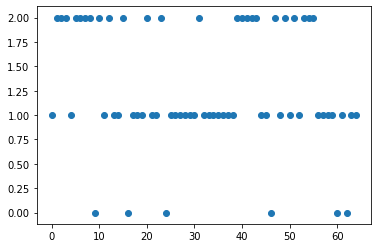

In [34]:
from matplotlib import pyplot
pyplot.scatter(x, tab)

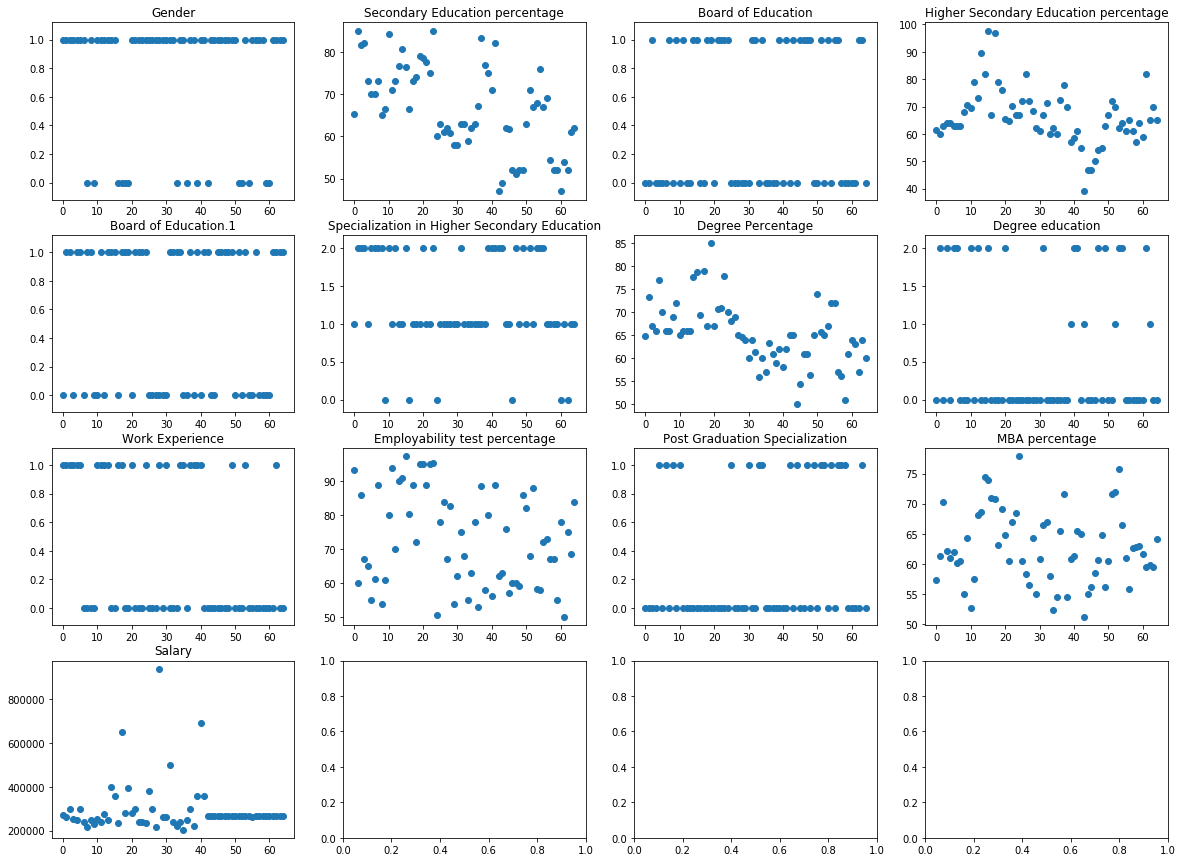

In [35]:
import matplotlib.pyplot as plt
tab = [] 
for l in range(13):
    tab.append([])
    for i in range(65):
        j = clustOrder[i]
        tab[l].append(X_test[j][l])
        
figure, axis = plt.subplots(4, 4)

axis[0, 0].scatter(x, tab[0])
axis[0, 0].set_title('Gender')

axis[0, 1].scatter(x, tab[1])
axis[0, 1].set_title('Secondary Education percentage')

axis[0, 2].scatter(x, tab[2])
axis[0, 2].set_title('Board of Education')

axis[0, 3].scatter(x, tab[3])
axis[0, 3].set_title('Higher Secondary Education percentage')

axis[1, 0].scatter(x, tab[4])
axis[1, 0].set_title('Board of Education.1')

axis[1, 1].scatter(x, tab[5])
axis[1, 1].set_title('Specialization in Higher Secondary Education')

axis[1, 2].scatter(x, tab[6])
axis[1, 2].set_title('Degree Percentage')

axis[1, 3].scatter(x, tab[7])
axis[1, 3].set_title('Degree education')

axis[2, 0].scatter(x, tab[8])
axis[2, 0].set_title('Work Experience')

axis[2, 1].scatter(x, tab[9])
axis[2, 1].set_title('Employability test percentage')

axis[2, 2].scatter(x, tab[10])
axis[2, 2].set_title('Post Graduation Specialization')

axis[2, 3].scatter(x, tab[11])
axis[2, 3].set_title('MBA percentage')

axis[3, 0].scatter(x, tab[12])
axis[3, 0].set_title('Salary')

figure.set_size_inches(20, 15)

plt.show() 

In [17]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3)

shap_val_reduced = pca3.fit_transform(shap_val)


In [18]:
shap_val_reduced[:,0]

array([-0.1317652 , -0.15457326, -0.01891122, -0.13021866,  0.26092295,
       -0.14891152, -0.12920645,  0.20318155, -0.14744595, -0.1342294 ,
       -0.111032  , -0.06092749, -0.12228148,  0.12892257,  0.19559335,
       -0.11872257, -0.15038953,  0.24491922, -0.12984377, -0.07008539,
        0.01178288, -0.14932486, -0.15317456,  0.02091463, -0.06807796,
       -0.16755719, -0.00482127, -0.12949639,  0.00706534,  0.27259994,
        0.29040924, -0.06702206,  0.01556716,  0.25105542, -0.01986524,
       -0.04032383,  0.23547205,  0.05921262,  0.10514398, -0.11423383,
       -0.1354088 , -0.03323405, -0.15341233, -0.0613982 ,  0.04078457,
       -0.01901362,  0.28486719,  0.26150639, -0.06615377, -0.07157583,
       -0.08757773, -0.07245017,  0.28620189, -0.14440098, -0.15155316,
       -0.14685619, -0.13263033, -0.11448635,  0.13653302, -0.00172007,
        0.21861085,  0.24939833,  0.01911508,  0.07852739,  0.18600506])

In [19]:
print(pca3.components_)

[[-9.20091886e-03  5.65267880e-01  5.29114619e-03  3.14276802e-01
  -1.50480377e-03 -1.69380890e-02  5.29654797e-01 -7.10311561e-03
   4.05168801e-02 -3.06300705e-03  1.51059175e-02  1.50932489e-03
   5.46657457e-01]
 [ 2.27219886e-02  4.53309407e-03 -8.80777714e-04  7.03077829e-02
   8.91573056e-04  3.38767242e-03 -7.37551664e-01  6.99008840e-03
   3.05074584e-02  6.11165582e-03  3.52799769e-02  6.11903080e-02
   6.66722300e-01]
 [ 3.99339402e-02 -7.28523487e-01 -4.15498954e-02  6.17240278e-01
   1.76423025e-04  1.70529713e-02  2.23133177e-01  1.86690756e-02
   1.86669054e-03 -1.79428428e-02 -8.10173286e-03  1.57598370e-02
   1.84064202e-01]]


In [44]:
Z_1 = pca3.components_[0]
Z_2 = pca3.components_[1]
Z_3 = pca3.components_[2]

In [45]:
Z_1   ## vecteur selon lequel les valeurs de Shapley ont la plus grande variance
    ## Z_1 =  'Secondary Education percentage' + 'Higher Secondary Education percentage' + 'Degree Percentage' + 'Salary'

array([-0.00920092,  0.56526788,  0.00529115,  0.3142768 , -0.0015048 ,
       -0.01693809,  0.5296548 , -0.00710312,  0.04051688, -0.00306301,
        0.01510592,  0.00150932,  0.54665746])

In [53]:
Z_2   ##  Z_2 = 'Salary' 

array([ 0.02272199,  0.00453309, -0.00088078,  0.07030778,  0.00089157,
        0.00338767, -0.73755166,  0.00699009,  0.03050746,  0.00611166,
        0.03527998,  0.06119031,  0.6667223 ])

In [55]:
from sklearn import preprocessing

X_norma = preprocessing.normalize(X_test)

In [56]:
Y_1 = np.dot(X_norma, Z_1) 
Y_2 = np.dot(X_norma, Z_2) 
Y_3 = np.dot(X_norma, Z_3) 

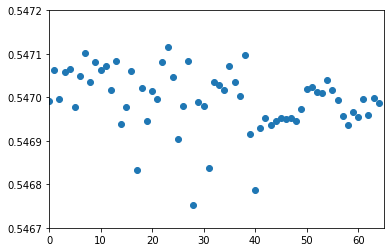

In [65]:
tab = []
for i in range (65):
    j = clustOrder[i]
    tab.append(Y_1[j])
    
plt.axis([0, 65, 0.5467, 0.5472])  
pyplot.scatter(x,tab)



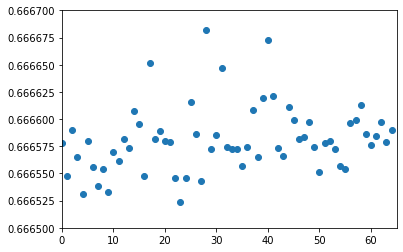

In [68]:
tab = []
for i in range (65):
    j = clustOrder[i]
    tab.append(Y_2[j])

plt.axis([0, 65, 0.6665, 0.6667])
pyplot.scatter(x,tab)

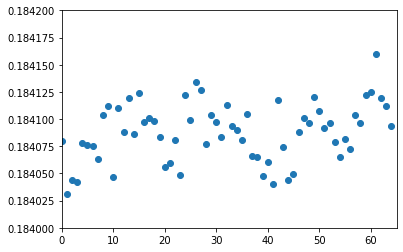

In [70]:
tab = []
for i in range (65):
    j = clustOrder[i]
    tab.append(Y_3[j])
    
plt.axis([0, 65, 0.184, 0.1842])
pyplot.scatter(x,tab)